Each task that is proposed to be completed as part of the homework has a declared "price" in points. The maximum possible amount is 10 points, and together with the bonus assignment - 12 points. It is not necessary to complete all the tasks, only a part can be done. Most of the points expect you to write working Python code; sometimes you will need to write comments - for example, to compare several approaches to solve the same problem. Also you can add more cells for your convenience if you need.

This homework focuses on clustering. We will work with images of handwritten digits, learn how to cluster them using two different methods (hierarchical clustering and the 𝐾-means algorithm), evaluate the quality of the partition and choose the optimal number of clusters, as well as visualize intermediate results.

## 1. Loading data
The data we will be working with is available in the scikit-learn library (`sklearn` module) in the `datasets` submodule via the `load_digits` function. The data contains 1,797 observations, each of which is 8×8 pixel image of a handwritten digit from 0 to 9. This is about the same amount of each digit (about 180).

For convenience, every image expands to a 64 (8×8) row, so entire numpy array is 1797×64. The color intensity in each pixel is encoded with an integer from 0 to 16.

In addition to images, their labels are also known. In this task, we will assume that the labels (as well as their amount) are unknown and try to group the data in such a way that the resulting clusters 'better match' the original ones. Possible options for determining the 'better match' are presented later.

**(0.25 points)** Load the images into `X` variable, and their labels into `y` variable.

In [6]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [158]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

In [8]:
assert X.shape == (1797, 64)
assert y.shape == (1797,)

**(0.5 points)** Visualize the first 10 images.

- Arrange images on a grid rather than in a row. You may need the `subplot` and `imshow` functions from the `pyplot` module in the `matplotlib` library.
- You will also need to reshape the images to 8×8.
- Remove ticks and labels from both axes. The `xticks` and `yticks` functions or the `tick_params` function from `pyplot` can help you with this.
- Make the output good sized with the `figure` function from `pyplot`.

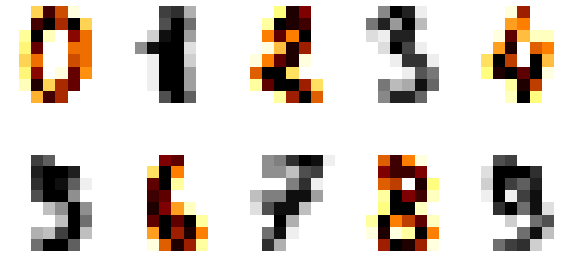

In [10]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)

## 2. Clustering and quality evaluation

**(2 points)** Implement the the KMeans algorithm. Use objective function $L = \sum_{i=1}^{n}|x_{i}-Z_{A(x_{i})}|^{2}$, where $Z_{A(x_{i})}$ is the center of the cluster corresponding to $x_{i}$ object.

In [ ]:
from sklearn.exceptions import NotFittedError
from numpy.random import RandomState

In [2]:
class CustomKMeans:
    def __init__(self, n_clusters=2, max_iter=30, n_init=10, random_state=42):
        '''K-Means clustering.
        
        Args:
            n_clusters: int, default=2
                The number of clusters to be formed is also 
                the number of centroids to generate. 
            max_iter: int, default=300
                Maximum number of iterations of the k-means algorithm for a
                single run.
            n_init: int, default=10
                Number of time the k-means algorithm will be run with different
                centroid seeds. The final results will be the best output of
                n_init consecutive runs in terms of objective function.
            random_state: int, default=42
                Random state.
        '''
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.random_state = RandomState(seed=random_state)
        
    def calculate_distances_to_centroids(self, X, cluster_centers):
        """
        Returns (n, c) matrix where the element at position (i, j) 
        is the distance from i-th object to j-th centroid."""
        # <your code>
        pass
    
    def update_centroids(self, X, nearest_clusters):
        """
        Returns numpy array of shape (n_clusters, n_features) - 
        new clusters that are found by averaging objects belonging 
        to the corresponding cluster."""
        # <your code>
        pass
        
    def fit(self, X):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        """
        assert X.shape[0] >= self.n_clusters
        # <your code>
        
        return self
            
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted cluster labels.
        """
        if hasattr(self, 'cluster_centers_'):
            # <your code>
            pass
        else: 
            raise NotFittedError("CustomKMeans instance is not fitted yet")

**(1 points)** Get the `X` array partition into 10 clusters. Visualize the centers of clusters.
- We will assume that the center of the cluster is average value of all observations belonging to the cluster.
- The cluster centers should have the same shape as our observations (64). So you have to average the points across the rows.

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
custom_kmeans_labels = kmeans.labels_
assert custom_kmeans_labels.shape == (1797,)

In [53]:
result=[]
for i in range(0, 10):
    new_list=[]
    for j in range (0, y.shape[0]):
        if custom_kmeans_labels[j]==i:
            new_list.append(X[j])
    result.append(np.array(new_list).mean(axis=0))
    

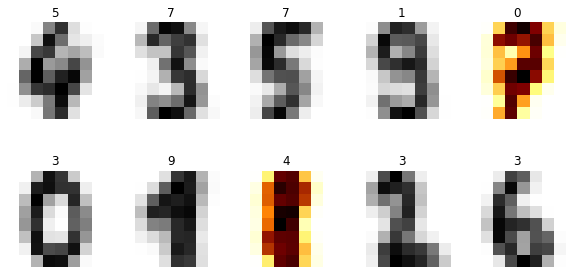

In [55]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), result, custom_kmeans_labels):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

(0.5 points) Experiment with max_iter and n_init parameters. Look at the range of values of the objective function, it's best values, at what parameters and how often they are achieved.

In [93]:
max_iter=np.linspace(2, 1000, 5, dtype=int)
n_init=np.linspace(2, 50, 5, dtype=int)
result=[]
for i in max_iter:
    objective=[]
    for j in n_init:
        kmeans = KMeans(n_clusters=10, n_init=j, max_iter=i).fit(X)
        objective.append(kmeans.inertia_)
    result.append(objective)   

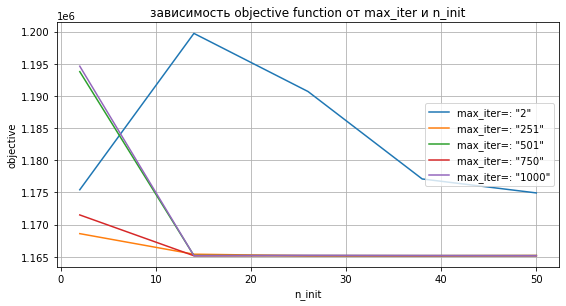

In [99]:
plt.figure(figsize=(9, 4.5))
for i in range (0, 5):
    plt.plot(n_init, result[i] , label=f'max_iter=: "{max_iter[i]}"')
plt.title("зависимость objective function от max_iter и n_init")
plt.xlabel('n_init')
plt.ylabel('objective')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()
    

лучшие параметры достигаются при количестве итераций больше 251 и n_init около 14, дальнейшее увеличение ни к чему не приводит

Now we will use two popular algorithms: hierarchical clustering and $K$-means clustering. These and other algorithms are available in the `scikit-learn` module in the `cluster` submodule. Hierarchical clustering is called `AgglomerativeClustering`, and the $K$-means method is called `KMeans`.

**(0.5 points)** Use each of the two methods: hierarchical clustering and KMeans. Get the `X` array partition into 10 clusters.

- Note that `AgglomerativeClustering` does not have a `predict` method, so you can either use the `fit_predict` method or use the `fit` method and then look at the `labels_` attribute of the class instance.
- Kmeans performs multiple runs (default 10) with random centers and then returns the best partition in terms of average distance within the clusters. You can increase the number of runs to improve the quality of predictions in the `i_init` parameter.

In [103]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=10).fit(X)
kmeans = KMeans(n_clusters=10, n_init=20).fit(X)


In [104]:
hierarchical_labels = clustering.labels_
kmeans_labels = kmeans.labels_

In [105]:
assert hierarchical_labels.shape == (1797,)
assert kmeans_labels.shape == (1797,)

**(0.5 points)** Visualize the centers of clusters obtained by both methods.

In [107]:
result=[]
for i in range(0, 10):
    new_list=[]
    for j in range (0, y.shape[0]):
        if custom_kmeans_labels[j]==i:
            new_list.append(X[j])
    result.append(np.array(new_list).mean(axis=0))
    

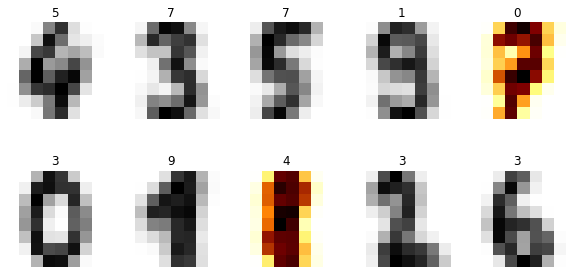

In [108]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), result, custom_kmeans_labels):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

In [110]:
result2=[]
for i in range(0, 10):
    new_list=[]
    for j in range (0, y.shape[0]):
        if hierarchical_labels[j]==i:
            new_list.append(X[j])
    result2.append(np.array(new_list).mean(axis=0))
    

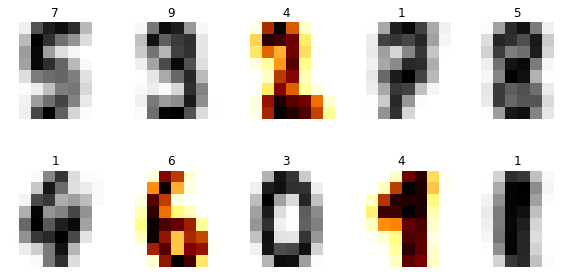

In [111]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), result2, hierarchical_labels):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

In a situation where the true number of classes is unknown, we can select it by maximazing some metric.

When we can set some distance function between our observations, we can consider the `silhouette` distance as a function of measuring the quality of the clustering. Let's show how it is calculated:

Let $X$ – set of observations, $M \subset X$ – one of the clusters obtained as a result of clustering process, $\rho$ – some metric on $X$. Let's choose one observation $x \in M$. Denote $a(x)$ as the average distance from $x$ to  $x'$ points from the same cluster:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Denote $b(x)$ as minimun of average distances from $x$ to $x''$ from some other cluster $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

The silhouette is difference between a(x) and b(x), normalized to $[-1, \, 1]$ and averaged over all observations:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

The implementation of this metric in the `scikit-learn` is the `silhouette_score` function from the `metrics` submidule.

**(0.75 point)** For each $K$ between 2 and 20 inclusive, partition of the array $X$ into $K$ clusters using both methods. Calculate the silhouette score and visualize it for both methods on the same plot ($K$ on the $x$ axis and silhouette score on the $y$ axis). Sign the axes and make a legend.

In [117]:
from sklearn.metrics import silhouette_samples, silhouette_score
clusters=np.linspace(2, 20, 19, dtype=int)

In [121]:
silhouette_kmeans=[]
for i in clusters: 
    kmeans = KMeans(n_clusters=i, n_init=15, random_state=10).fit(X)
    labels=kmeans.labels_
    silhouette_kmeans.append(silhouette_score(X, labels))

In [120]:
silhouette_hierarchical=[]
for i in clusters: 
    clustering = AgglomerativeClustering(n_clusters=i).fit(X)
    labels=clustering.labels_
    silhouette_hierarchical.append(silhouette_score(X, labels))

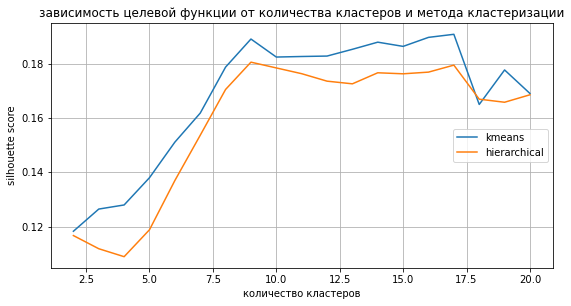

In [122]:
plt.figure(figsize=(9, 4.5))
plt.plot(clusters, silhouette_kmeans, label='kmeans')
plt.plot(clusters, silhouette_hierarchical, color='C1', label='hierarchical')
plt.title("зависимость целевой функции от количества кластеров и метода кластеризации")
plt.xlabel('количество кластеров')
plt.ylabel('silhouette score')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()
    

When we know the true clustering labels, the clustering result can be compared to them using measures such as `homogeneity`, `completeness` and their harmonic mean - $V$-score. The definitions of these quantities are rather bulky and are based on the [entropy of the probability distribution](https://ru.wikipedia.org/wiki/Информационная_энтропия). Details are given in [this article](http://aclweb.org/anthology/D/D07/D07-1043.pdf). In practice, it's enough to know that `homogeneity`, `completeness` and $V$-score are in the range from 0 and 1, and the more, the better.

Since we know what digit each image is (`y` array), we can compare the clustering results to it using the measures listed above.

**(0.5 points)** Repeat the previous task using $V$-measure instead of silhouette.

In [125]:
from sklearn.metrics.cluster import v_measure_score
v_kmeans=[]
for i in clusters: 
    kmeans = KMeans(n_clusters=i, n_init=15, random_state=10).fit(X)
    labels=kmeans.labels_
    v_kmeans.append(v_measure_score(y, labels))


In [126]:
v_hierarchical=[]
for i in clusters: 
    clustering = AgglomerativeClustering(n_clusters=i).fit(X)
    labels=clustering.labels_
    v_hierarchical.append(v_measure_score(y, labels))

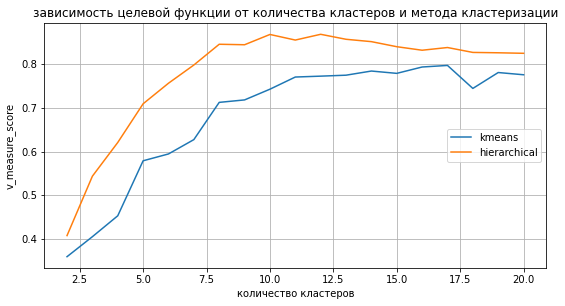

In [127]:
plt.figure(figsize=(9, 4.5))
plt.plot(clusters, v_kmeans, label='kmeans')
plt.plot(clusters, v_hierarchical, color='C1', label='hierarchical')
plt.title("зависимость целевой функции от количества кластеров и метода кластеризации")
plt.xlabel('количество кластеров')
plt.ylabel('v_measure_score')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()

## 3. Feature space dimensionality reduction

In some cases, especially when there are a large number of features, when not all of them are informative, and some of them are correlated, it can be useful to reduce the dimension of the feature space. This mean that instead of $d$ original features, we will go to $d'\ll d$ new ones. And if earlier our data were presented in the form of an $n×d$ matrix, then it will presented as a $n×d'$.

There are two popular dimensionality reduction approaches:
- select new features from existing features;
- extract the new features by transforming old ones, for example, by making $d'$ different linear combinations of columns of an $n×d$ matrix.

One widely used dimensionality reduction technique is the Singular Value Decomposition (SVD). This method allows you to construct any number $d'\leq d$ of new features in such a way that they are the most informative (in some sense).

The `scikit-learn` module has several implementations of singular value decomposition. We will use the `TruncatedSVD` class from the `decomposition` submodule.

**Note:** The singular value decomposition of the matrix $M$ is usually written as $M=U \Sigma V^{*}$. `TruncatedSVD`, in turn, returns only the $d'$ first columns of the matrix $U$.

**(0.75 point)** Perform a singular value decomposition of the $X$ matrix, leaving 2, 5, 10, 20 features. In each case, perform hierarchical clustering and $K$-Means clustering (take the number of clusters equal to 10). Calculate the silhouette and $V$-score and compare them to corresponding values obtained from the original data.

**Note**: It is not valid to compare the silhouette calculated with different metrics. Even if we use the same metric function when calculating the distance between points in the data, after applying dimensionality reduction or other data transformations, we will (not always) get different silhouette scores. Therefore, after training the clustering algorithm, to compare the result of clustering, you need to calculate the silhouette on the original data.

In [141]:
from sklearn.decomposition import TruncatedSVD

In [150]:
reduction=[2,5,10,20]
kmeans_silhouette=[]
kmeans_v=[]
hierarchical_silhouette=[]
hierarchical_v=[]
for i in reduction:
    svd = TruncatedSVD(n_components=i, random_state=42)
    new_x=svd.fit_transform(X)
    
    kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(new_x)
    labels=kmeans.labels_
    kmeans_v.append(v_measure_score(y, labels))
    kmeans_silhouette.append(silhouette_score(new_x, labels))
    
    clustering = AgglomerativeClustering(n_clusters=10).fit(new_x)
    labels_h=clustering.labels_
    hierarchical_v.append(v_measure_score(y, labels_h))
    hierarchical_silhouette.append(silhouette_score(new_x, labels_h))
    

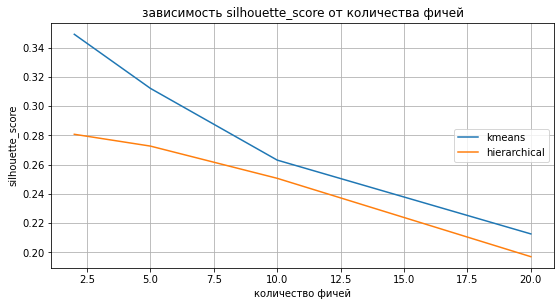

In [146]:
plt.figure(figsize=(9, 4.5))
plt.plot(reduction, kmeans_silhouette, label='kmeans')
plt.plot(reduction, hierarchical_silhouette, color='C1', label='hierarchical')
plt.title("зависимость silhouette_score от количества фичей")
plt.xlabel('количество фичей')
plt.ylabel('silhouette_score')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()

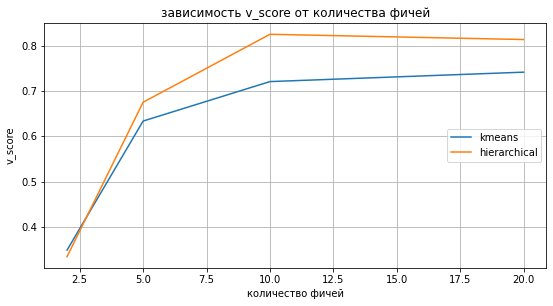

In [147]:
plt.figure(figsize=(9, 4.5))
plt.plot(reduction,kmeans_v, label='kmeans')
plt.plot(reduction, hierarchical_v, color='C1', label='hierarchical')
plt.title("зависимость v_score от количества фичей")
plt.xlabel('количество фичей')
plt.ylabel('v_score')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()

v_score при количестве фичей 10 становится приблизительно таким же, как и на первоначальных данных. silhouette_score стремиться к таковому на первоначальных данных при увеличении количества фичей, а вообще больше по значению

Another popular dimensionality reduction approach that is useful for working with images is t-distributed stochastic neighbor embeddings, abbreviated `tSNE`. Unlike singular value decomposition, this it is non-linear transformation. It's main idea is to map points from a space of dimension `d` to another space of dimension 2 or 3 in such a way that the distances between points are mostly preserved. Mathematical details can be found, for example, [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

The implementation of `tSNE` in the `scikit-learn` library is the `TSNE` class in the `manifold` submodule.

**Note:** In recent years [UMAP](https://github.com/lmcinnes/umap) is often used istead of `tSNE`. It is a faster algorithm with similar properties. We don't ask you to use `UMAP` because it requires you to install another dependency, the `umap-learn` library. Those who wish can perform the following task using `UMAP`.

**(0.5 points)** Perform a tSNE-transform of the `X` matrix, leaving 2 features. Visualize the obtained data in the form of a scatter plot form: the first feature on the horizontal axis, and the second one the vertical axis. Color the points according to the digits they belong to.

- The `c` parameter in the plt.scatter function is responsible for the color of the points. Pass the true labels to it.

In [159]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

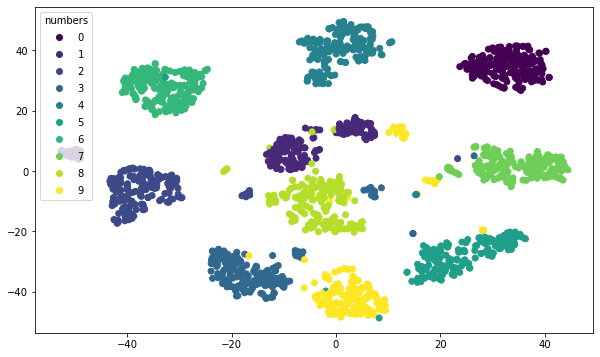

In [180]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y)
legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="numbers")
plt.show()

**(0.5 points)** From the data transformed using the tSNE, perform hierarchical clustering and $K$-means clustering (take the number of clusters equal to 10). Calculate the silhouette and the $V$-score and compare them to corresponding values obtained from the original data.

In [183]:
#кластеризация KMeans после tSNE и результаты
kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(X_embedded)
labels=kmeans.labels_
kmeans_v_new=v_measure_score(y, labels)
kmeans_silhouette_new=silhouette_score(X_embedded, labels)
kmeans_v_new

0.9034493403014201

In [184]:
kmeans_silhouette_new

0.63327175

In [186]:
#кластеризация и результаты первоначальных данных
kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(X)
labels=kmeans.labels_
kmeans_v=v_measure_score(y, labels)
kmeans_silhouette=silhouette_score(X, labels)
kmeans_v

0.7430251165632649

In [187]:
kmeans_silhouette

0.18250367210596583

In [189]:
#кластеризация иерархическая после tSNE и результаты
clustering = AgglomerativeClustering(n_clusters=10).fit(X_embedded)
labels_h=clustering.labels_
hierarchical_v_new=v_measure_score(y, labels_h)
hierarchical_silhouette_new=silhouette_score(X_embedded, labels_h)
hierarchical_v_new

0.903595905869624

In [190]:
hierarchical_silhouette_new

0.6298934

In [191]:
#кластеризация и результаты первоначальных данных
clustering = AgglomerativeClustering(n_clusters=10).fit(X)
labels_h=clustering.labels_
hierarchical_v=v_measure_score(y, labels_h)
hierarchical_silhouette=silhouette_score(X, labels_h)
hierarchical_v

0.8681701126909083

In [192]:
hierarchical_silhouette

0.17849659940596496

In [230]:
svd = TruncatedSVD(n_components=1)
new_x=svd.fit_transform(x)
svd.explained_variance_ratio_

array([0.93461349])

после tSNE результаты выше как при иерархической кластеризации, так и KMeans. Вероятно, много неинформативных фичей приводит к худшему результату кластеризации

**(0.25 points)** Choose the best partition (in terms of silhouette or $V$-score) and visualize the centers of clusters with images. Did you managed to make each digit correspond to one center of the cluster?

In [212]:
svd = TruncatedSVD(n_components=20, random_state=42)
new_x=svd.fit_transform(X)
kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(new_x)
labels=kmeans.labels_

In [213]:
result=[]
for i in range(0, 10):
    new_list=[]
    for j in range (0, labels.shape[0]):
        if labels[j]==i:
            new_list.append(new_x[j])
    result.append(np.array(new_list).mean(axis=0))
    

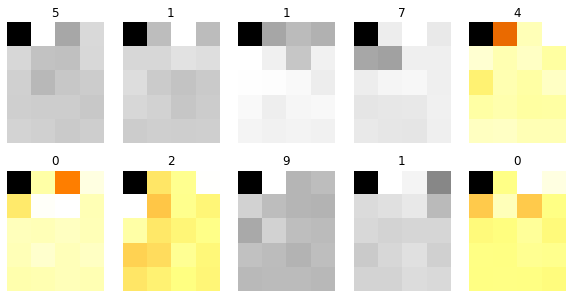

In [215]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), result, labels):
    ax.set_axis_off()
    ax.imshow(image.reshape((5, 4)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

при SVD редукции визуально нельзя отнести получившиесчя изображения к определенному классу

## 4. Results and bonus part

Write in free form what conclusions you made after completing this assignment. Answer the following questions:

**(0.5 points)** Which algorithm gives more meaningful results - hierarchical clustering or $K$- means clustering. Does it depend on the algorithm settings or on the quality evaluation method?

и 𝐾 - means и иерархическая кластеризация одинаково хороши при правильной настройке параметров. v-score выши был при иерархической кластеризации, а
silhouette_score при 𝐾 - means кластеризации. при визуализации разницы я не заметила

**(0.5 points)** Imagine the situation where after hierarchical clustering, you need to cluster new data in the same way without retraining the model. Suggest a method how you will do it and how you will measure the quality of clustering of new data.

нужно сравнить каждое наблюдение в новых данных с наблюдениями в первоначальных(предварительно нормированных и скалированных), 
каждому наблюдению нужно найти максимально похожее в первоначальных данных, и как бы заменить первоначальное максимально похожим из нового датасета. Похожесть можно искать разными методами, напримкер евклидову норму взять.
Качество можно оценить с помощью silhouette_score, сравнивая на первоначальных и обновленных. очень большая разница будет 
свидетельствовать о плохих результатах кластеризации


**(0.5 points)** Does dimensionality reduction improve clustering results?

да, причем значительно. это связано с удалением лишних данных, которые на самом деле не помогают в отнесении к какому либо кластеру, но алгоритм их учитывает

**(0.5 points)** How to evaluate the quality of dimensional reduction? Suggest at least 2 options.

первый способ посчитать точность отнесения к определенному классу после уменьшения размерности к первоначальным данным, 
второй - посмотреть такую метрику как например silhouette_score, которая покажет качество кластеризации

**(Bonus 2 points)** Load the [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist) dataset. You can also do it with `scikit-learn` as explained [here](https://stackoverflow.com/a/60450028). Explore the data and try to cluster it using different approaches. Compare results of these approaches using the silhouette and the $V$-score.

In [238]:
import sklearn
sklearn.__version__

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [246]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [247]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [249]:
sum(X.isnull().sum())

0

In [251]:
#применим метод KMeans
kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(X)
labels=kmeans.labels_
silhouette_kmeans=silhouette_score(X, labels)
silhouette_kmeans

0.05869201052848778

In [252]:
kmeans_v=v_measure_score(y, labels)
kmeans_v

0.4997437873174721

In [253]:
# иерархическая кластеризация
clustering = AgglomerativeClustering(n_clusters=10).fit(X)
labels=clustering.labels_
silhouette_hierarchical=silhouette_score(X, labels)

In [254]:
silhouette_hierarchical

0.025175230458420364

In [255]:
hierarchical_v_new=v_measure_score(y, labels)
hierarchical_v_new

0.6816236881789693

In [256]:
# SVD редукция
reduction=[100,225,484]
kmeans_silhouette=[]
kmeans_v=[]
hierarchical_silhouette=[]
hierarchical_v=[]
for i in reduction:
    svd = TruncatedSVD(n_components=i, random_state=42)
    new_x=svd.fit_transform(X)
    
    kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(new_x)
    labels=kmeans.labels_
    kmeans_v.append(v_measure_score(y, labels))
    kmeans_silhouette.append(silhouette_score(new_x, labels))
    
    clustering = AgglomerativeClustering(n_clusters=10).fit(new_x)
    labels_h=clustering.labels_
    hierarchical_v.append(v_measure_score(y, labels_h))
    hierarchical_silhouette.append(silhouette_score(new_x, labels_h))
    

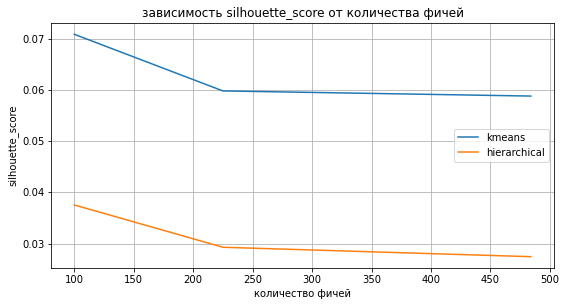

In [257]:
plt.figure(figsize=(9, 4.5))
plt.plot(reduction, kmeans_silhouette, label='kmeans')
plt.plot(reduction, hierarchical_silhouette, color='C1', label='hierarchical')
plt.title("зависимость silhouette_score от количества фичей")
plt.xlabel('количество фичей')
plt.ylabel('silhouette_score')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()

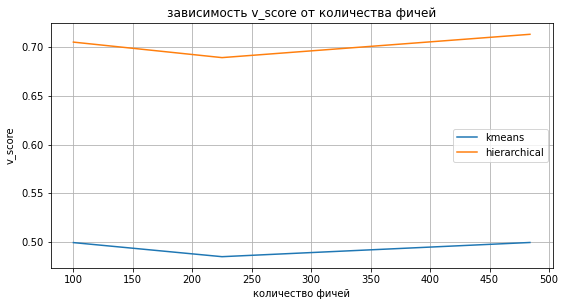

In [258]:
plt.figure(figsize=(9, 4.5))
plt.plot(reduction,kmeans_v, label='kmeans')
plt.plot(reduction, hierarchical_v, color='C1', label='hierarchical')
plt.title("зависимость v_score от количества фичей")
plt.xlabel('количество фичей')
plt.ylabel('v_score')
plt.grid(True) 
plt.legend(loc='center right') 
plt.show()

In [259]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

In [260]:
kmeans = KMeans(n_clusters=10, n_init=15, random_state=10).fit(X_embedded)
labels=kmeans.labels_
kmeans_v_new=v_measure_score(y, labels)
kmeans_silhouette_new=silhouette_score(X_embedded, labels)
kmeans_v_new

0.7913192798112195

In [261]:
kmeans_silhouette_new

0.40172207

In [262]:
clustering = AgglomerativeClustering(n_clusters=10).fit(X_embedded)
labels_h=clustering.labels_
hierarchical_v_new=v_measure_score(y, labels_h)
hierarchical_silhouette_new=silhouette_score(X_embedded, labels_h)
hierarchical_v_new

0.8235202081124259

In [263]:
hierarchical_silhouette_new

0.39042166

результаты лучше после уменьшения размерности, при SVD редукции можно оставить 100 фичей. KMeans и иерархическая кластеризация примерно дают одинаковые результаты